<a href="https://colab.research.google.com/github/ejjjjkang/computational_methods/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U "scikit-learn==0.23.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [2]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


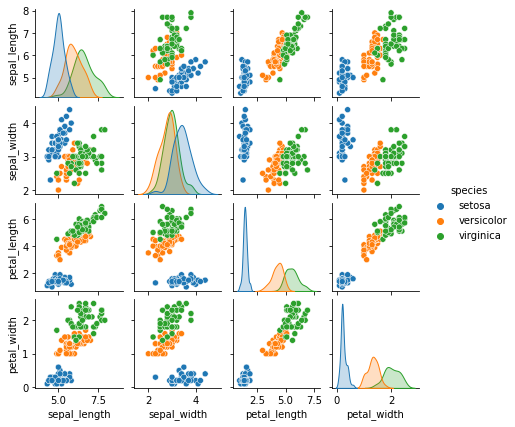

In [4]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', size=1.5);

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y_iris = iris['species']
y_iris.shape

(150,)

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [18]:
Xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5


In [19]:
ytrain.head()

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [10]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate the model with hyperparameters
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # naive classification algorithm is effective for this particular dataset

0.9736842105263158

In [20]:
from sklearn.decomposition import PCA  #1. choose model class
model = PCA(n_components =2)  # 2. instantiate the model with hyperparameters
model.fit(X_iris) # 3. fit model to data
X_2D = model.transform(X_iris) # 4. predict on new data

### Feature Engineering

#### Categorical data

In [ ]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

# if we change the categorical data into the number, the scikitlearn package would perceive it as numberical features
# Thus, we could apply one-hot encoding to them

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

# 'neighborhood' column has been expanded into three separate columns, representing the three neighborhood labels.

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [ ]:
#inspect the feature names:

vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [ ]:
#to avoide if the category has many possible values, we could make the output efficient by applying sparse output

vec = DictVectorizer(sparse = True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

#### Text Features

In [ ]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
import pandas as pd

pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec =  TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Simple Linear Regression

Linear Regression is a type of Regression Model and. Supervised Learning Algorithm in Machine Learning. Linear regression is a linear approach to modelling the relationship between a scalar response (y-dependent variables) and one or more explanatory variables (X - independent variables)

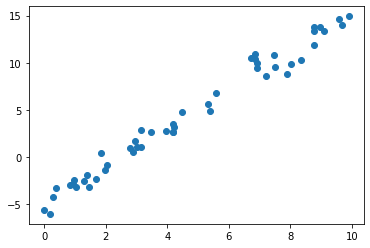

In [ ]:
#random data generator

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

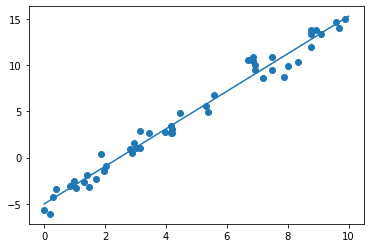

In [ ]:
model = LinearRegression(fit_intercept= True)
model.fit(x[:, np.newaxis], y)

xfit= np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit) # draw line


In [ ]:
print("Model slope: ", model.coef_[0])
print("Model intercept: ", model.intercept_)

Model slope:  2.0272088103606953
Model intercept:  -4.998577085553204


In [25]:
from sklearn.linear_model import LinearRegression
import pandas as pd
#reference : https://medium.com/analytics-vidhya/linear-regression-using-iris-dataset-hello-world-of-machine-learning-b0feecac9cc1 

iris = sns.load_dataset('iris')
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Mean Squared Error:  0.10651474916905855


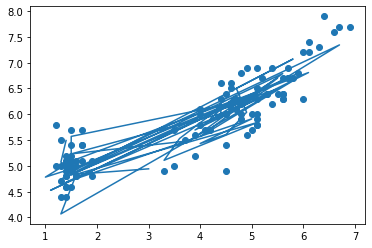

In [48]:
from sklearn.metrics import mean_squared_error
#Linear Regression - Objective : predict the sepal length (cm) of the iris flowers

X = iris.drop(labels=['sepal_length', 'species'], axis = 1)
Y = iris['sepal_length']

#splitting the Dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, 
                                                random_state=101)
#Instantiating LinearRegression model
lr = LinearRegression()

#Training / Fitting the model
lr.fit(Xtrain, ytrain)

#Making the prediction
lr.predict(Xtest)
pred = lr.predict(Xtest)

plt.scatter(Xtrain['petal_length'], ytrain)
plt.plot(Xtest['petal_length'], pred)

print("Mean Squared Error: ", mean_squared_error(ytest, pred)) # 

# A lower MSE indicates that the model is better at predicting the dependent variable values, 
#  as it means that the predicted values are closer to the actual values.

## Multi Linear Regression